In [1]:
# it's best practice to have your imports up top so others can immediately know what to install
# if you import more modules, add them here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [3]:
# reading from a CSV: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# df = pd.read_csv("data/foo.csv")

# reading from a CSV without column names
# df = pd.read_csv("data/foo.csv", columns=["date", "company", "valuation"])

In [12]:
df = pd.read_csv("HPD_Crime.csv")

In [17]:
df.head(10)

,Location_Desc,Police_Beat,Street_Type,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Prefix,Street_Name,Num_Offenses,...,X,Y,GEOID10,GEOID00,Police_Division,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour
0,NaN,14D40,RD,1,NaN,Burglary,5600-5699,NaN,SELINSKY,1,...,-95.333268,29.637514,4.820133e+14,4.820133e+14,Southeast Division,K066,Minnetex,1,NaN,8
1,NaN,7C20,NaN,2,NaN,Theft,3900-3999,NaN,CAVALCADE,1,...,-95.331799,29.800081,4.820121e+14,4.820121e+14,Northeast Division,K004,Kashmere Gardens,1,NaN,11
2,NaN,13D40,PKWY,3,NaN,Theft,8500-8599,S,SAM HOUSTON,1,...,-95.516291,29.625560,4.820133e+14,4.820133e+14,Southwest Division,K070,Five Corners,1,NaN,15
3,NaN,18F40,RD,4,NaN,Robbery,2700-2799,NaN,DUNVALE,1,...,-95.514200,29.736820,4.820143e+14,4.820143e+14,Midwest Division,K080,Mid-West,1,NaN,14
4,RESTAURANT/CAFETERIA,24C60,PKWY,5,09/08/1914,Burglary,12700-12799,W,LAKE HOUSTON,1,...,-95.195466,29.924672,4.820125e+14,4.820125e+14,Kingwood Division,K106,Lake Houston,1,210,7
5,MISC. BUSINESS (NON-SPECIFIC),18F60,BLVD,6,11/02/1914,Burglary,8800-8899,NaN,BELLAIRE,1,...,-95.540426,29.705107,4.820143e+14,4.820143e+14,Westside Division,K079,Sharpstown,1,05Z,3
6,NaN,12D20,FWY,7,12/03/1914,Auto Theft,12800-12899,NaN,GULF,1,...,-95.212582,29.612434,4.820133e+14,4.820133e+14,Clear Lake Division,K117,South Belt / Ellingt,1,NaN,19
7,OTHER PARKING LOT,3B10,NaN,8,01/05/1915,Theft,3200-3299,NaN,MANGUM RD 180,1,...,-95.459288,29.818449,4.820153e+14,4.820153e+14,North Division,K032,Oak Forest,1,18O,22
8,APARTMENT PARKING LOT,5F10,DR,9,01/14/1915,Auto Theft,7000-7099,NaN,WESTVIEW,1,...,-95.470506,29.794615,4.820152e+14,4.820152e+14,Northwest Division,K083,Spring Branch East,1,18A,23
9,OFFICE BUILDING,1A20,NaN,10,04/24/1915,Burglary,3100-3199,NaN,SMITH,1,...,-95.380281,29.744024,4.820141e+14,4.820141e+14,Central Division,K023,Midtown,1,05O,7


In [14]:
df.describe()

,RecordID,Num_Offenses,NGC,X,Y,GEOID10,GEOID00,Geocoded,Hour
count,1.094207e+06,1.094207e+06,242420.000000,1.080683e+06,1.080683e+06,1.063260e+06,1.063260e+06,1.094207e+06,1.094207e+06
mean,5.471040e+05,1.015262e+00,0.012924,-9.387951e+01,2.927203e+01,4.820125e+14,4.820125e+14,9.717174e-01,1.310504e+01
std,3.158705e+05,1.613578e-01,0.112946,1.201800e+01,3.748233e+00,7.909409e+10,7.909512e+10,1.657791e-01,6.425957e+00
min,1.000000e+00,1.000000e+00,0.000000,-9.578030e+01,0.000000e+00,4.815767e+14,4.815767e+14,0.000000e+00,0.000000e+00
25%,2.735525e+05,1.000000e+00,0.000000,-9.550640e+01,2.968407e+01,4.820131e+14,4.820131e+14,1.000000e+00,9.000000e+00
50%,5.471040e+05,1.000000e+00,0.000000,-9.541192e+01,2.973750e+01,4.820141e+14,4.820141e+14,1.000000e+00,1.400000e+01
75%,8.206555e+05,1.000000e+00,0.000000,-9.533682e+01,2.980469e+01,4.820145e+14,4.820145e+14,1.000000e+00,1.800000e+01
max,1.094207e+06,3.300000e+01,1.000000,0.000000e+00,3.009652e+01,4.833969e+14,4.833969e+14,1.000000e+00,2.400000e+01


In [15]:
df.shape

(1094207, 23)

In [18]:
df.groupby(["Location_Desc", "Street_Type"]).Offense_Type.count()

Location_Desc                              Street_Type
ADULT BOOK STORE/NEWSSTAND                 AVE              10
                                           BLVD              4
                                           DR               31
                                           FWY             119
                                           HWY               7
                                           PKWY              6
                                           RD               29
                                           SER               4
                                           ST                2
ADULT NOVELTY STORE                        AVE               1
                                           DR                1
                                           FWY               2
                                           RD                5
                                           ST                2
                                           WAY               1


In [20]:
df.groupby(["Location_Desc", "Offense_Type"]).Hour.count()

Location_Desc                                                           Offense_Type      
ADULT BOOK STORE/NEWSSTAND                                              Aggravated Assault      12
                                                                        Auto Theft               5
                                                                        Burglary                 8
                                                                        Robbery                108
                                                                        Theft                  114
ADULT NOVELTY STORE                                                     Auto Theft               1
                                                                        Robbery                  3
                                                                        Theft                   11
ADULT THEATER/ARCADE                                                    Rape                     2
                  

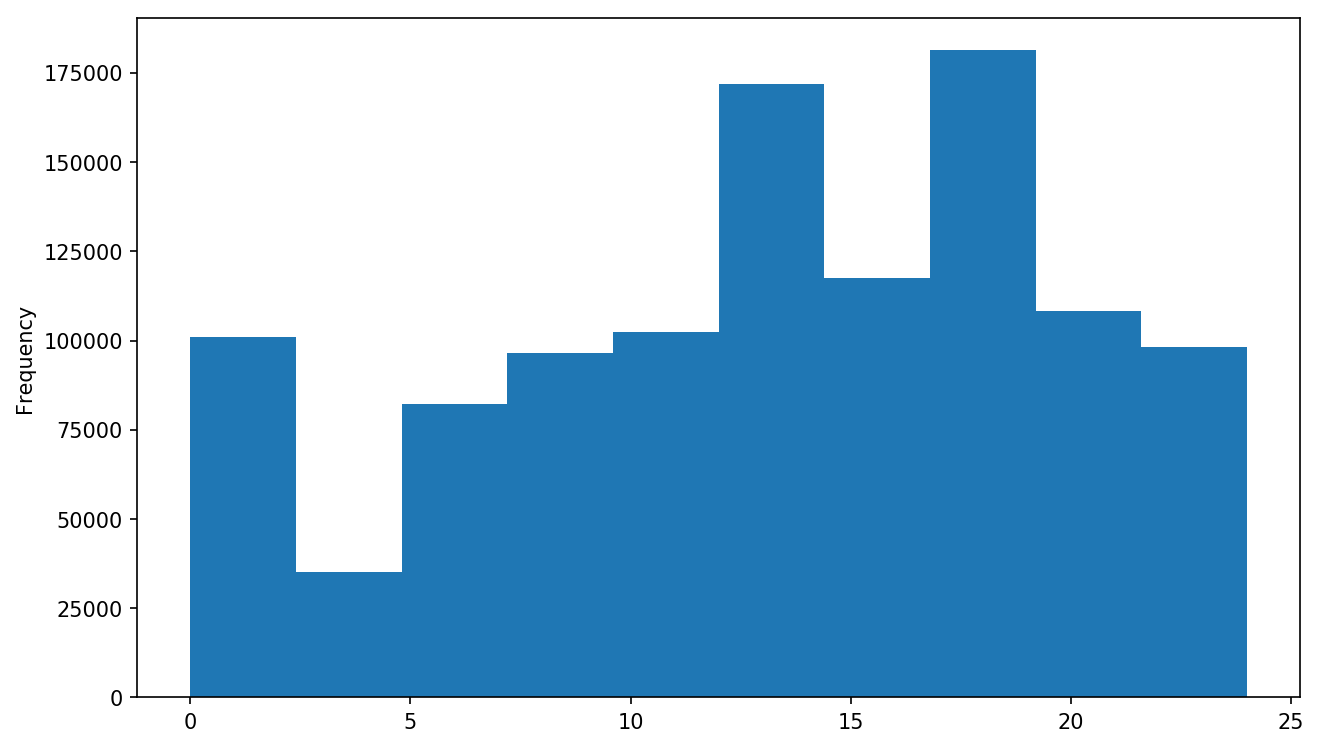

In [31]:
df.Hour.plot.hist()

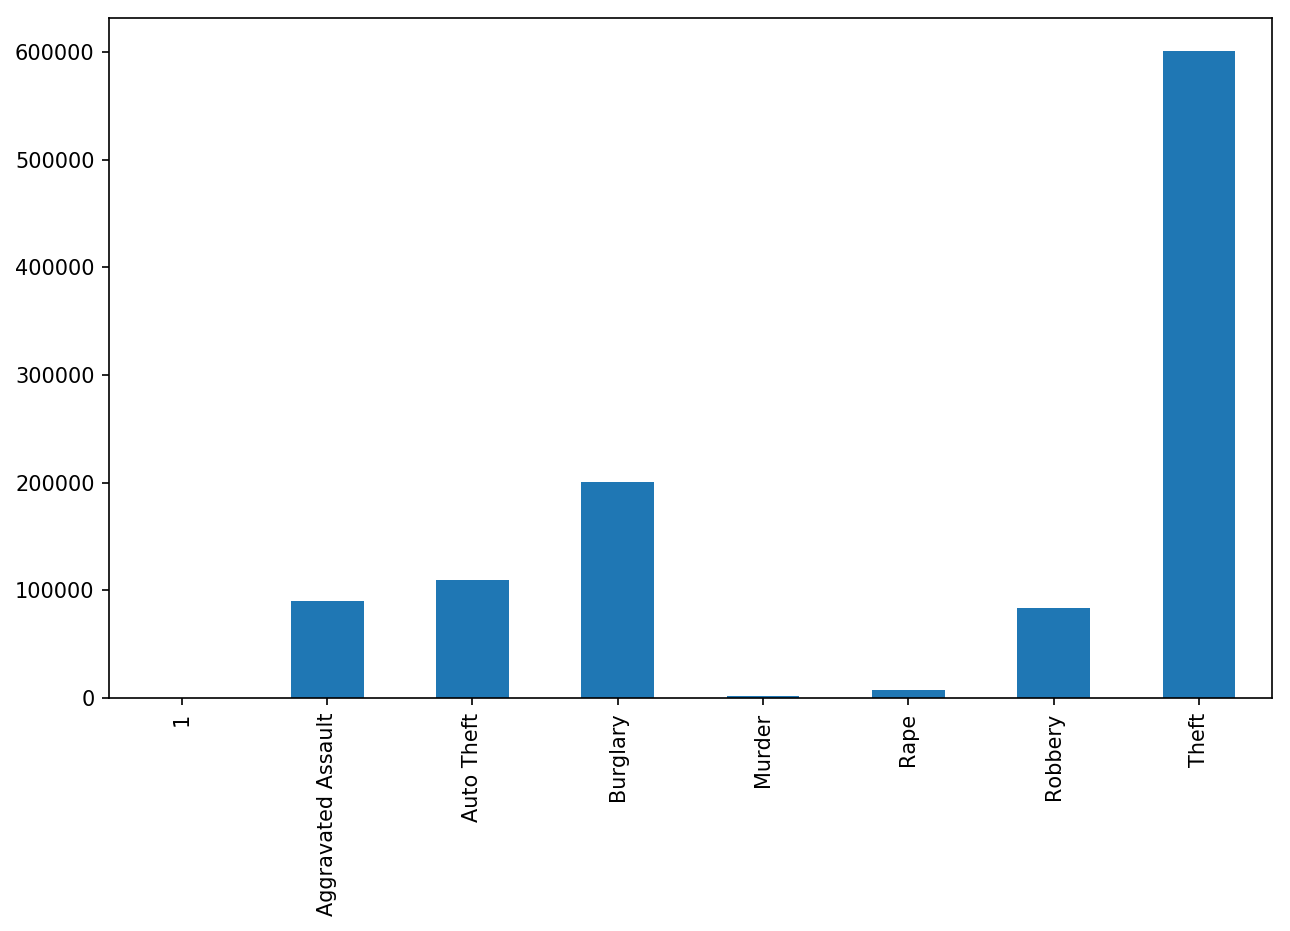

In [24]:
df.Offense_Type.value_counts().sort_index().plot.bar()

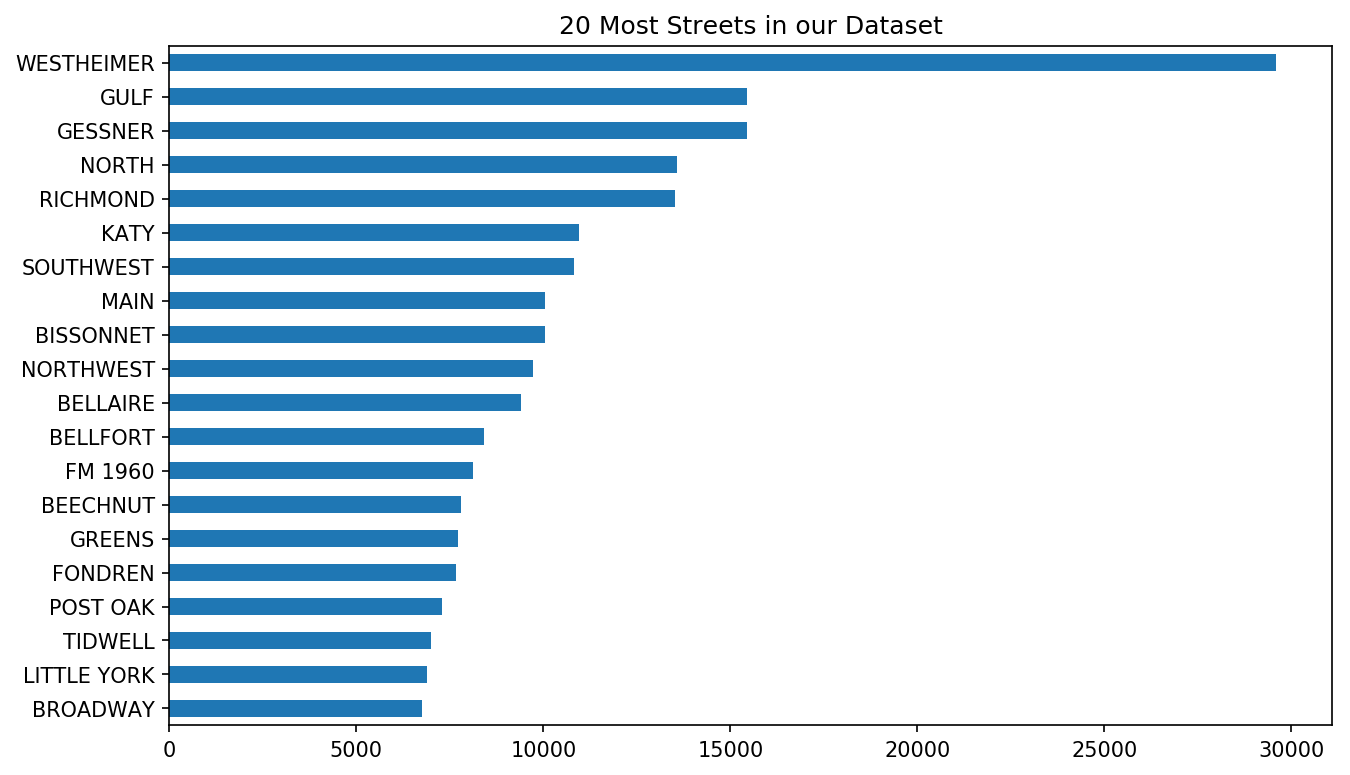

In [29]:
df.Street_Name.value_counts().sort_values(ascending=True).tail(20).plot.barh()
plt.title("20 Most Streets in our Dataset");